$$\tau \dot{x}(t) = Mx(t) + I(t)$$

$$\dot{x}(t) = \frac{x(t + dt) - x(t)}{dt}$$

$$x(t+dt) = \biggl(1 + \frac{dt}{\tau} M \biggr) x(t) + \frac{dt}{\tau} I(t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

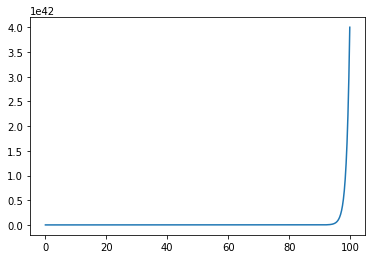

In [2]:
dt = 0.1     # ms, timestep
tau = 10.0    # ms, timescale
T = 100      # ms, runtime
nNeuron = 20

nT = int(T/dt)
eta = dt / tau

M = np.random.uniform(0, 1, (nNeuron, nNeuron))
Meff = np.eye(nNeuron) + eta * M


def simulate(M):
    x = np.zeros((nT, nNeuron))
    x[0] = np.random.uniform(0, 1, nNeuron)
    
    for i in range(nT-1):
        I = np.random.uniform(0, 1, nNeuron) + 0.1 * np.sin(2 * np.pi * i * dt / (2 * tau))
        x[i+1] = M.dot(x[i]) + eta * I

    times = np.arange(nT) * dt
    xMag = np.linalg.norm(x, axis=1)

    plt.figure()
    plt.plot(times, xMag)
    plt.show()
    
    
simulate(Meff)

In [3]:
np.max(np.linalg.eig(Meff)[0])

(1.1021798733592167+0j)

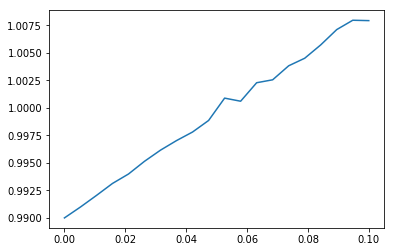

In [4]:
def make_trans_matrix(alpha):
    M = alpha * np.random.uniform(0, 2, (nNeuron, nNeuron))
    np.fill_diagonal(M, -np.ones(nNeuron))
    Meff = np.eye(nNeuron) + eta * M
    return Meff

alphaLst = np.linspace(0, 0.1, 20)
maxEig = [np.max(np.real(np.linalg.eig(make_trans_matrix(a))[0])) for a in alphaLst]

plt.figure()
plt.plot(alphaLst, maxEig)
plt.show()

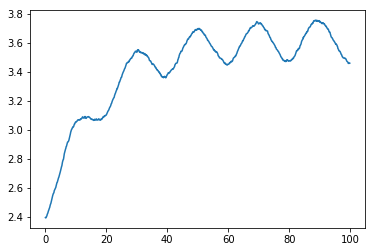

In [8]:
Meff = make_trans_matrix(0.02)
simulate(Meff)